2 Лабораторная работа

Цель - познакомиться с методом кластеризации K-mean с помощью пакета sklearn. 

Для выполнения задания используется набор данных из предыдущей лр.

Что нужно сделать:
1. К текущему датасету необходимо добавить новый аттрибут, например, если есть дата рождения,
 то посчитать возраст или определить популярность фильма по количеству просмотров и т.п.

2. "Причесать" датасет: удалить выбросы и дубли, обработать пропущенные значения, найти кривые 
данные и т.п.

3. Построить графики зависимости одной переменной от другой (plt.scatter), описать какие кластеры
 (группы) вы видите. Построить несколько разных графиков, найти ярковыраженные группы.

4. Изучить перечисленные ноутбуки, по примеру, попробовать применить метод KMeans к вашему 
датасету 

5. Написать выводы



# Преобразуем данные, чтобы с ними было удобнее работать и вычислим еще несколько столбцов.


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import datetime
raw_data = pd.read_csv(r"C:\Users\Varia\Documents\3_kurs\machine_learning\bitcoin.csv")
data = raw_data.rename(columns=
                    {'Open Time':'open_time','Open':'open_price','High':'high_price','Low':'low_price','Close':'close_price',
                    'Volume':'volume','Close Time':'close_time','Quote asset volume':'quote_asset_volume',
                    'Number of trades':'number_of_trades','Taker buy base asset volume':'taker_buy_base_asset_volume',
                    'Taker buy quote asset volume':'taker_buy_quote_asset_volume'})
data['open_time'] = pd.to_datetime(data['open_time'], unit='ms')
data['close_time'] = pd.to_datetime(data['close_time'], unit='ms')
data['readable_quote'] = data['quote_asset_volume'].apply(lambda x: f"{x:.2f}")

# Установка 'Date' как индекс
data.set_index('open_time', inplace=True)

# Рассчет волатильности (30-дневное стандартное отклонение цены закрытия)
data['Volatility'] = data['close_price'].rolling(window=30).std()

# Рассчет скользящей средней (20-дневная скользящая средняя)
data['SMA_20'] = data['close_price'].rolling(window=20).mean()

# Добавление столбца с днем недели
data['DayOfWeek'] = data.index.day_name()

# Группировка по дням недели для анализа трендов
weekly_trends = data.groupby('DayOfWeek')['close_price'].mean()

# Создаем столбец 'date' для извлечения только даты
data['date'] = data.index.date

# Рассчитываем объем торгов за сутки путем группировки по дате и нахождения среднего значения объема
daily_avg_volume = data.groupby('date')['volume'].mean()

# Присоединяем средний объем торгов к основному датасету
data = data.join(daily_avg_volume.rename('daily_avg_volume'), on='date')

# Удаляем временный столбец 'date', если он больше не нужен
data.drop(columns='date', inplace=True)

# вывод данных 
data

,open_price,high_price,low_price,close_price,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,readable_quote,Volatility,SMA_20,DayOfWeek,daily_avg_volume
open_time,,,,,,,,,,,,,,,
2021-01-01 00:00:00,28923.63,28961.66,28913.12,28961.66,27.457032,2021-01-01 00:00:59.999,7.943820e+05,1292,16.777195,485390.826825,794382.04,NaN,NaN,Friday,37.627031
2021-01-01 00:01:00,28961.67,29017.50,28961.01,29009.91,58.477501,2021-01-01 00:01:59.999,1.695803e+06,1651,33.733818,978176.468202,1695802.90,NaN,NaN,Friday,37.627031
2021-01-01 00:02:00,29009.54,29016.71,28973.58,28989.30,42.470329,2021-01-01 00:02:59.999,1.231359e+06,986,13.247444,384076.854453,1231358.69,NaN,NaN,Friday,37.627031
2021-01-01 00:03:00,28989.68,28999.85,28972.33,28982.69,30.360677,2021-01-01 00:03:59.999,8.800168e+05,959,9.456028,274083.075142,880016.76,NaN,NaN,Friday,37.627031
2021-01-01 00:04:00,28982.67,28995.93,28971.80,28975.65,24.124339,2021-01-01 00:04:59.999,6.992262e+05,726,6.814644,197519.374888,699226.21,NaN,NaN,Friday,37.627031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-12 04:35:00,57517.42,57526.28,57485.00,57485.07,42.575735,2021-05-12 04:35:59.999,2.448258e+06,1195,15.319691,880913.090845,2448258.07,109.654360,57688.2515,Wednesday,45.541311
2021-05-12 04:36:00,57485.07,57496.42,57466.75,57481.49,34.205467,2021-05-12 04:36:59.999,1.966194e+06,1096,15.971891,918058.816162,1966194.47,118.527784,57670.5955,Wednesday,45.541311
2021-05-12 04:37:00,57477.18,57509.99,57458.18,57470.00,30.211789,2021-05-12 04:37:59.999,1.736514e+06,955,13.054229,750364.577319,1736514.48,125.345294,57653.2000,Wednesday,45.541311


# Обработка пропущенных значений

в предыдущей работе мы определили, что у нас есть два столбца с пропущенными значениями, попробуем определить причины их появления. Первые 29 строк в столбце Volatility пропущены, так как для вычисления 30-дневного стандартного отклонения(у нас именно такое) требуется минимум 30 значений. Аналогичная ситуация с SMA_20. На первых 19 днях у нас просто нет 20 предыдущих значений для расчета средней, поэтому результат будет NaN. Просто удалив строки с NaN, мы не решим проблему, поэтому можно заполнить пропуски средними значениями.

In [148]:
# Обработка пропущенных значений
data['Volatility'].fillna(data['Volatility'].mean(), inplace=True)
data['SMA_20'].fillna(data['SMA_20'].mean(), inplace=True)
data['daily_avg_volume'].fillna(data['daily_avg_volume'].mean(), inplace=True)



# Обработка выбросов

In [66]:
# Определение выбросов с помощью IQR(интерквартильного размаха)
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outliers = {col: detect_outliers_iqr(data[col]) for col in data.select_dtypes(include=[np.number]).columns}
#print("Выбросы:\n", outliers)
# Подсчет общего количества выбросов
total_outliers = sum(len(outlier) for outlier in outliers.values())
print("Общее количество выбросов:", total_outliers)

Общее количество выбросов: 36265


# При исследовании данных было обнаружено, что выбросов как таковых в этом датасете мало, их сложно найти. При удалении выбросов классическими методами данные становятся неполными и не поддаются исследованию


In [131]:
data_filled = data.copy()

for col in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 4.5 * IQR
    upper_bound = Q3 + 4.5 * IQR
    
    # Удаляем строки с выбросами
    data_filled = data_filled[(data_filled[col] >= lower_bound) & (data_filled[col] <= upper_bound)]

# Повторно находим выбросы после обработки
outliers_after_processing = {col: detect_outliers_iqr(data_filled[col]) for col in data_filled.select_dtypes(include=[np.number]).columns}

# Подсчитываем общее количество оставшихся выбросов
total_outliers_after_processing = sum(len(outlier) for outlier in outliers_after_processing.values())
print("Общее количество выбросов после обработки:", total_outliers_after_processing)

# Сохраняем обработанный датасет в CSV
data_filled.to_csv('processed_data.csv', index=False)

Общее количество выбросов после обработки: 13726


У нас осталось небольшое количество выбросов, это связано с тем, что данные имеют большие хвосты и полностью избавиться от выбросов с помощью  IQR не получается

In [132]:
processed_data = pd.read_csv(r"C:\Users\Varia\PycharmProjects\jupyter notebooks\processed_data.csv")


# Найдем дубли и обработаем их

In [133]:
# Подсчет количества дубликатов
duplicate_count = data.duplicated().sum()
print("Количество дубликатов:", duplicate_count)

Количество дубликатов: 0


# Ниже представлены по два графика на каждый "признак", чтобы наглядно увидеть разницу при использовании датасета с выбросами и без

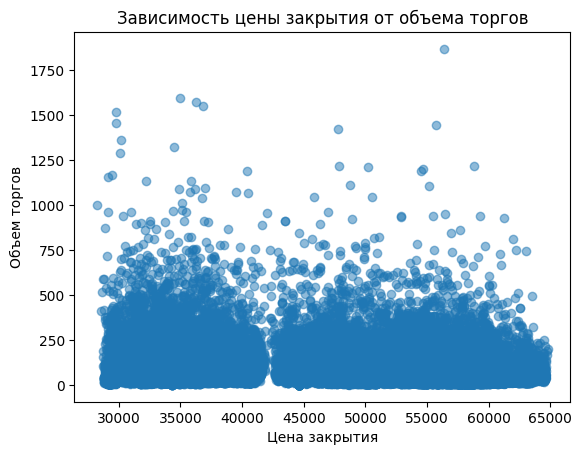

In [134]:
# График 1: Зависимость цены закрытия от объема
plt.scatter(data['close_price'], data['volume'], alpha=0.5)
plt.xlabel('Цена закрытия')
plt.ylabel('Объем торгов')
plt.title('Зависимость цены закрытия от объема торгов')
plt.show()

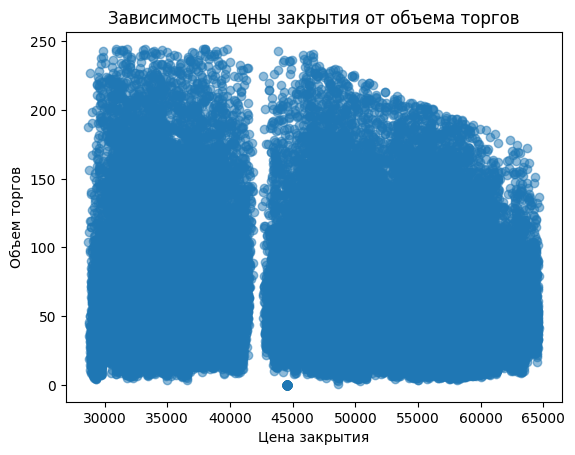

In [135]:
# График 1: Зависимость цены закрытия от объема
plt.scatter(processed_data['close_price'], processed_data['volume'], alpha=0.5)
plt.xlabel('Цена закрытия')
plt.ylabel('Объем торгов')
plt.title('Зависимость цены закрытия от объема торгов')
plt.show()

В данном случае больше информации нам дает график с обработанными выбросами, так как мы более четко видим небольшое снижение объема торгов при повышении цены закрытия

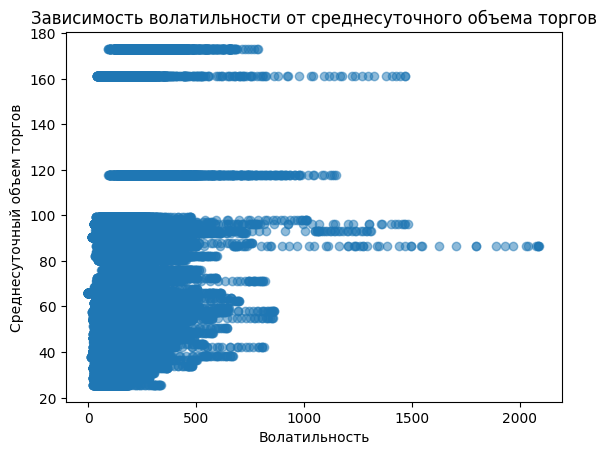

In [145]:
#График зависисмости волатильности от среднесуточного объема торгов
plt.scatter(data['Volatility'], data['daily_avg_volume'], alpha=0.5)
plt.xlabel('Волатильность')
plt.ylabel('Среднесуточный объем торгов')
plt.title('Зависимость волатильности от среднесуточного объема торгов')
plt.show()

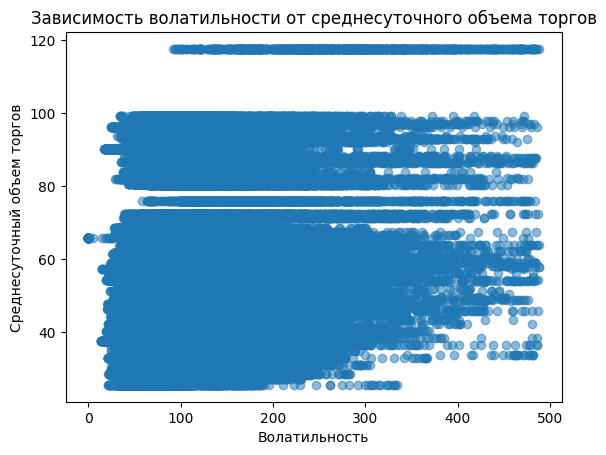

In [137]:
plt.scatter(processed_data['Volatility'], processed_data['daily_avg_volume'], alpha=0.5)
plt.xlabel('Волатильность')
plt.ylabel('Среднесуточный объем торгов')
plt.title('Зависимость волатильности от среднесуточного объема торгов')
plt.show()

*Волатильность — это когда цена на что-то меняется. Она показывает, насколько сильно и быстро меняется цена на валюту за определённое время. Волатильность помогает понять, насколько рискованно инвестировать в актив. Чем больше волатильность, тем больше риск и доход.


В этом случае мне кажется более наглядным первый график, на нем видно, что при низком объеме торгов и  волотильность невелика, а вот при достижении средних объемов торгов она резко увеличивается.

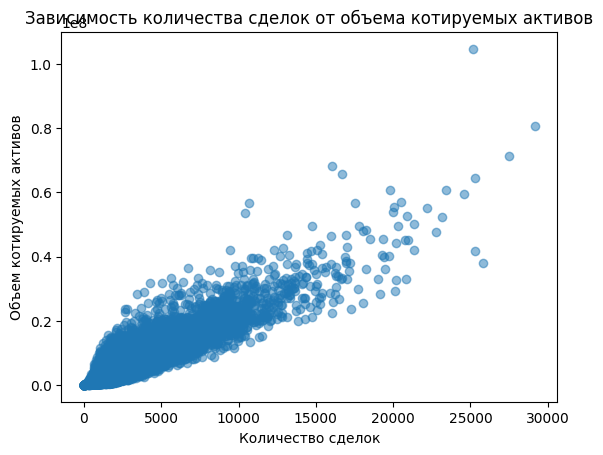

In [147]:
#График зависисмости количества сделок от объема котируемых активов
plt.scatter(data['number_of_trades'], data['quote_asset_volume'], alpha=0.5)
plt.xlabel('Количество сделок')
plt.ylabel('Объем котируемых активов')
plt.title('Зависимость количества сделок от объема котируемых активов')
plt.show()

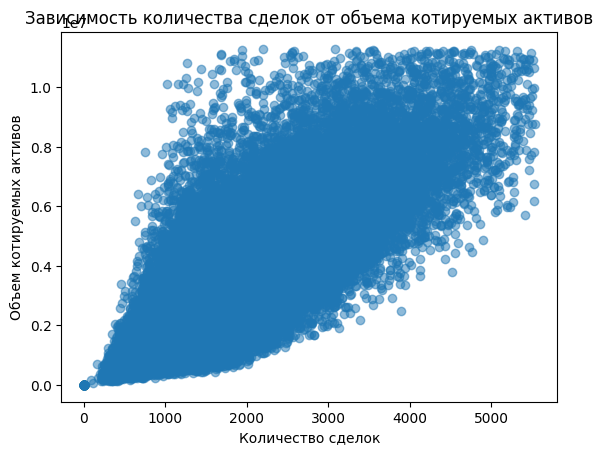

In [139]:
plt.scatter(processed_data['number_of_trades'], processed_data['quote_asset_volume'], alpha=0.5)
plt.xlabel('Количество сделок')
plt.ylabel('Объем котируемых активов')
plt.title('Зависимость количества сделок от объема котируемых активов')
plt.show()

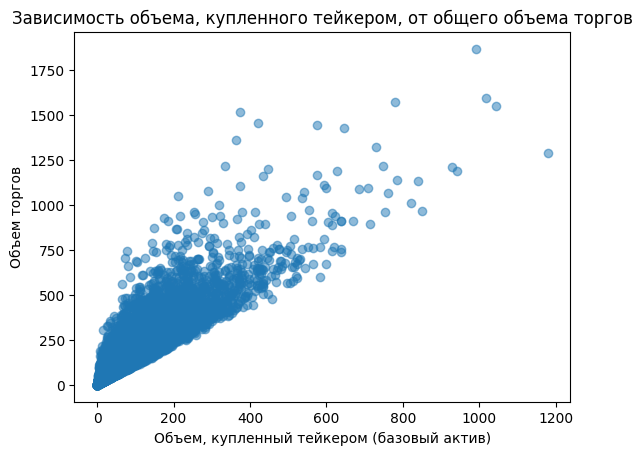

In [140]:
plt.scatter(data['taker_buy_base_asset_volume'], data['volume'], alpha=0.5)
plt.xlabel('Объем, купленный тейкером (базовый актив)')
plt.ylabel('Объем торгов')
plt.title('Зависимость объема, купленного тейкером, от общего объема торгов')
plt.show()

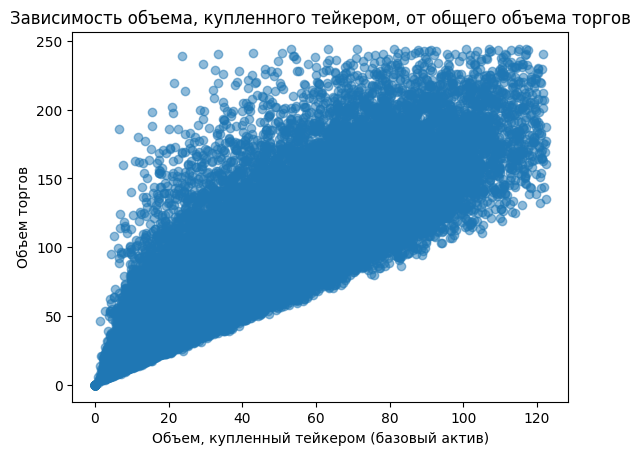

In [141]:
plt.scatter(processed_data['taker_buy_base_asset_volume'], processed_data['volume'], alpha=0.5)
plt.xlabel('Объем, купленный тейкером (базовый актив)')
plt.ylabel('Объем торгов')
plt.title('Зависимость объема, купленного тейкером, от общего объема торгов')
plt.show()

График зависимости скользящей средней от цены закрытия демонстрирует почти идеальную линейную зависимость. Это означает, что скользящая средняя 20-дневного периода почти точно повторяет динамику цены закрытия с небольшими запаздываниями.

# При создании кластеров я тоже использовала два датасета, результат и там и там довольно схожий, но все же на очищенном от выбросов наборе данных немного понятнее.

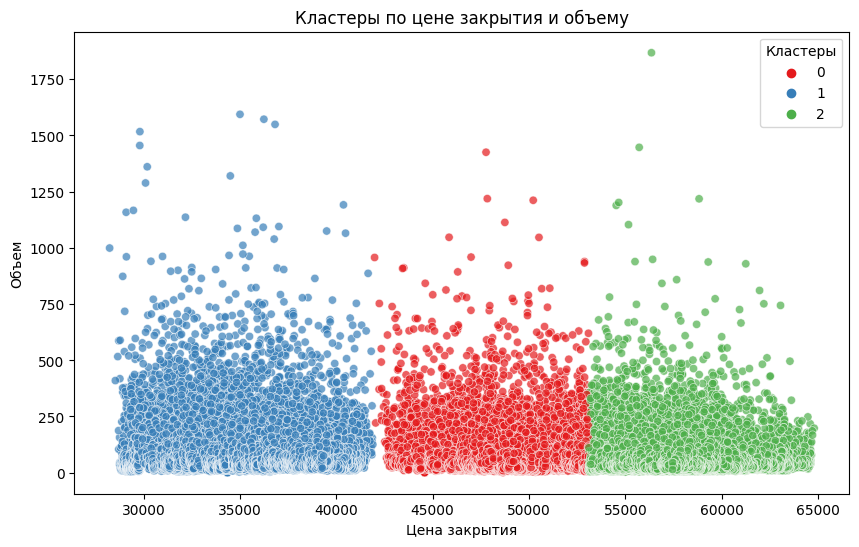

In [142]:
# Выбираем переменные для кластеризации
features = data[['close_price', 'volume']].dropna()  # Убираем пропущенные значения
kmeans = KMeans(n_clusters=3, random_state=42)
features['Cluster'] = kmeans.fit_predict(features)

# Визуализируем кластеры
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='close_price', y='volume', hue='Cluster', palette='Set1', alpha=0.7)
plt.xlabel('Цена закрытия')
plt.ylabel('Объем')
plt.title('Кластеры по цене закрытия и объему')
plt.legend(title='Кластеры')
plt.show()

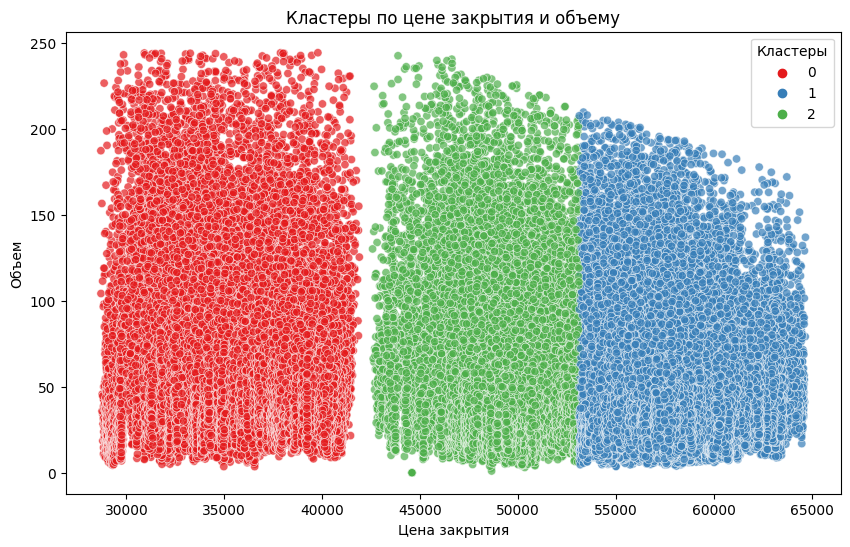

In [143]:
# Выбираем переменные для кластеризации
features = processed_data[['close_price', 'volume']].dropna()  # Убираем пропущенные значения
kmeans = KMeans(n_clusters=3, random_state=42)
features['Cluster'] = kmeans.fit_predict(features)

# Визуализируем кластеры
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='close_price', y='volume', hue='Cluster', palette='Set1', alpha=0.7)
plt.xlabel('Цена закрытия')
plt.ylabel('Объем')
plt.title('Кластеры по цене закрытия и объему')
plt.legend(title='Кластеры')
plt.show()

На графике видно распределение точек по трем цветовым группам (кластерам), каждая из которых представляет одну из категорий, найденных алгоритмом KMeans на основе схожести по цене закрытия и объему. Вот что означает каждый цвет:

    Красный кластер: высокая цена закрытия и более низкий объем
    Синий кластер: низкая цена закрытия и высокий объем
    Зеленый кластер: средние значения цены закрытия и объема торгов

Кластеризация позволяет выявить закономерности или группировки в данных, которые могут быть полезны для анализа и понимания того, как цена и объем могут варьироваться между группами.

При выполнении работы мне мне интереснее всего было поработать с выбросами и на примерах изучить, всегда ли нужна их обработка.Также в данной работе мы ближе познакомились с обработкой данных и методом кластеризации  KMeans